In [25]:
import os
import shutil
import argparse
import numpy as np
import math
#from core.data_provider import datasets_factory
from DataFactoryCapture2Slice import DataTypeEnum,CustomDataLoader,CustomDataset
import matplotlib.pyplot as plt

In [26]:
DS=CustomDataset(dataSetName='PBSet3',dataRoot="./DataSetSmall/",dataType=DataTypeEnum.Lcap2slice,
                 randOrFix=0,sequence_length=16,
                 useClips=True,withChannel=True,ChannelLast=True,px=1,size=128,randFlag=1)
cDL=CustomDataLoader(DS,train_batch_size=4,test_batch_size=4,train_ratio=0.9,shuffle=True)

data prepare finished.....


In [27]:
train_dataLoader,test_dataLoader=cDL.train_dataloader,cDL.test_dataloader

In [28]:
len(DS),len(train_dataLoader),len(test_dataLoader)

(978, 220, 25)

In [29]:
batch=next(iter(train_dataLoader))
sequences_cap,sequences_slice,durations=batch['sequences_cap'],batch["sequences_slice"],batch['durations']
sequences_cap.shape,sequences_slice.shape

(torch.Size([4, 16, 128, 128, 1]), torch.Size([4, 16, 128, 128, 1]))

In [30]:
durations

tensor([[[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
         [2.0000],
         [2.5000],
         [3.0000],
         [3.5000],
         [4.0000],
         [4.5000],
         [5.0000],
         [5.5000],
         [6.0000],
         [6.5000],
         [7.0000],
         [7.5000]],

        [[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
         [2.0000],
         [2.5000],
         [3.0000],
         [3.5000],
         [4.0000],
         [4.5000],
         [5.0000],
         [5.5000],
         [6.0000],
         [6.5000],
         [7.0000],
         [7.5000]],

        [[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
         [2.0000],
         [2.5000],
         [3.0000],
         [3.5000],
         [4.0000],
         [4.5000],
         [5.0000],
         [5.5000],
         [6.0000],
         [6.5000],
         [7.0000],
         [7.5000]],

        [[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
      

In [31]:
b,s,h,w,c=sequences_slice.shape

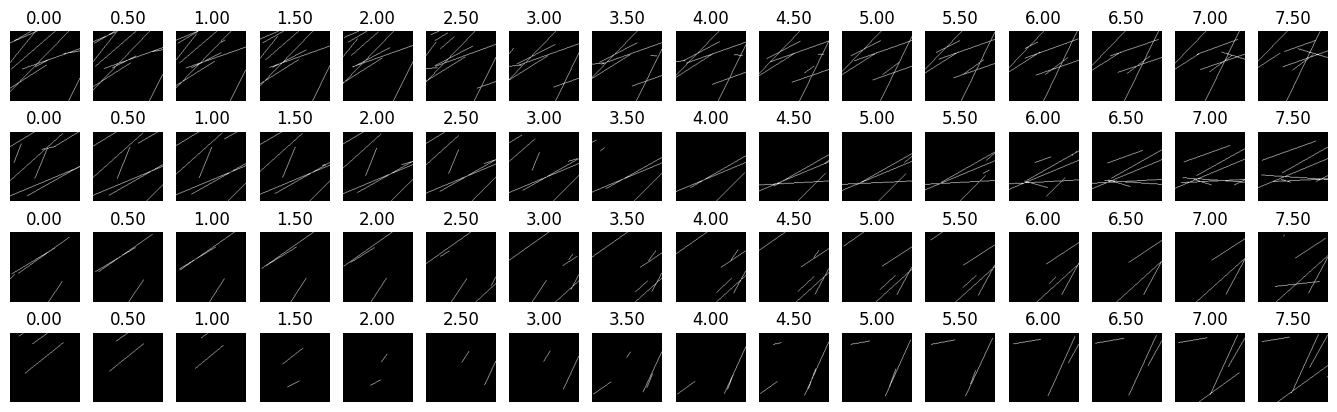

In [32]:
#sequence by slice
fig,a =  plt.subplots(b,s,figsize = (s+1,b+1))
for i in range(b):
    for j in range(s):
        a[i][j].imshow(sequences_slice[i,j,:,:,:],cmap="gray")
        a[i][j].set_axis_off()
        a[i][j].set_title("%.2f"%durations[i,j,0].numpy())

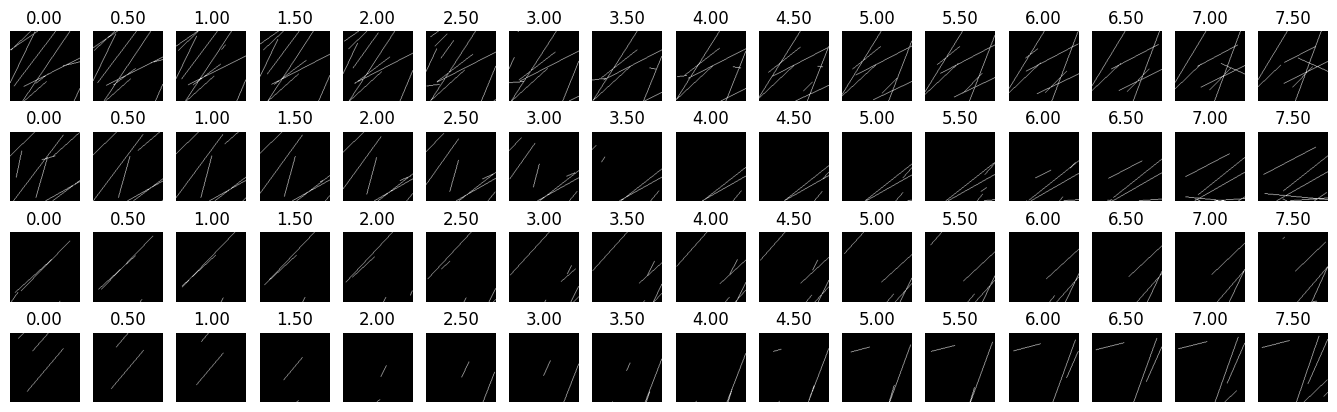

In [33]:
#sequence by capture
b,s,h,w,c=sequences_cap.shape
fig,a =  plt.subplots(b,s,figsize = (s+1,b+1))
for i in range(b):
    for j in range(s):
        a[i][j].imshow(sequences_cap[i,j,:,:,:],cmap="gray")
        a[i][j].set_axis_off()
        a[i][j].set_title("%.2f"%durations[i,j,0].numpy())

In [34]:
sequences_con=np.concatenate([sequences_cap[:,:8,:,:,:],sequences_slice[:,8:,:,:,:]],axis=1)
b,s,h,w,c=sequences_con.shape
print(sequences_con.shape)

(4, 16, 128, 128, 1)


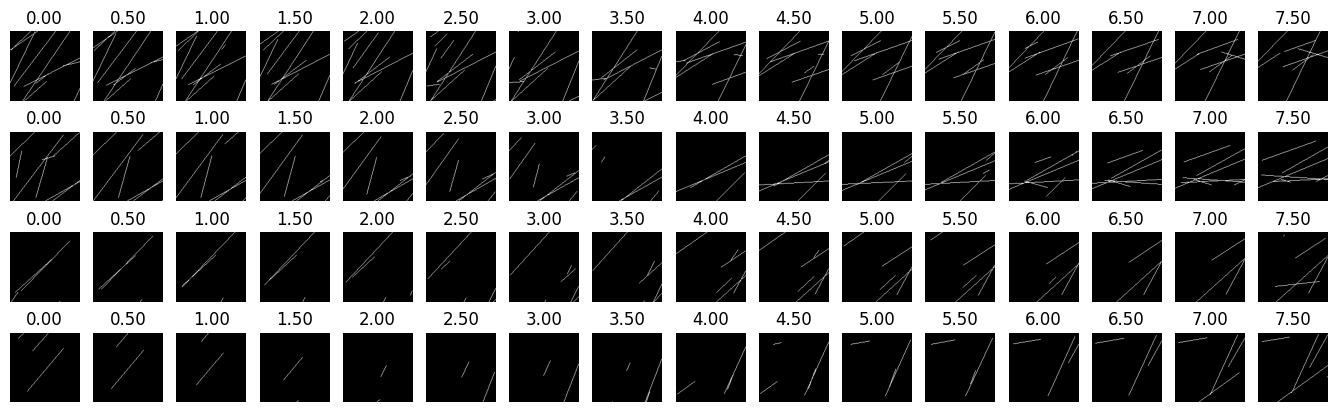

In [35]:
#sequence by capture to slice
fig,a =  plt.subplots(b,s,figsize = (s+1,b+1))
for i in range(b):
    for j in range(s):
        a[i][j].imshow(sequences_con[i,j,:,:,:],cmap="gray")
        a[i][j].set_axis_off()
        a[i][j].set_title("%.2f"%durations[i,j,0].numpy())
        # if i==0 and j<8:
        #     a[i][j].set_title("capture")
        # if i==0 and j>=8:
        #     a[i][j].set_title("slice")